In [1]:
import glob
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib import dates as mpl_dates
from sklearn import preprocessing as prep
from scipy.stats import pearsonr

In [2]:
#wind turbine dataset
turbine_data = pd.read_csv("windturbines.csv")

In [3]:
#wind power produced dataset
wind_power_data = pd.read_csv('windpower_task0_updated.csv')

#rename time series column and remove timezone
wind_power_data = wind_power_data.rename(columns= {'Unnamed: 0' : 'time'},)
dt= wind_power_data.time
wind_power_data.time = pd.to_datetime(wind_power_data.time).dt.tz_localize(None)
#plt.plot(wind_power_data.SE3)

In [4]:
#weather dataset over SE3 region
# '2000 first quarter SE3.csv' generated in Initial_I notebook
df_en1_SE3 = pd.read_csv('./2000 first quarter SE3.csv')
df_en1_SE3.time = pd.to_datetime(df_en1_SE3.time)
df_en1_SE3 = df_en1_SE3.drop(labels=['Unnamed: 0'], axis=1)
#convert 'time' column to index
df_en1_SE3=df_en1_SE3.set_index('time')

In [5]:
df_jan = df_en1_SE3.loc['2000-01-01 00:00:00':'2000-01-31 00:00:00']

In [6]:
df_jan.columns

Index(['CloudCover', 'Pressure', 'RelativeHumidity', 'Temperature',
       'WindGustSpeed', 'Wind_U', 'Wind_V'],
      dtype='object')

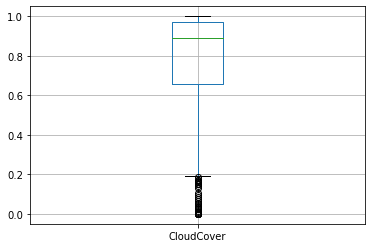

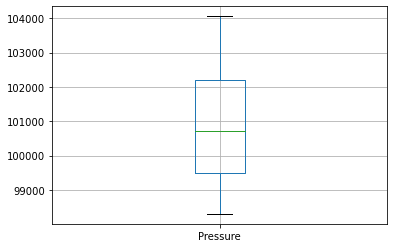

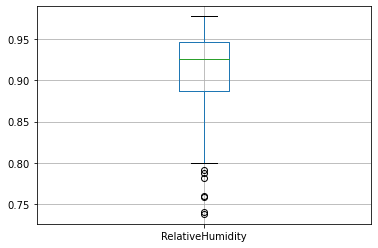

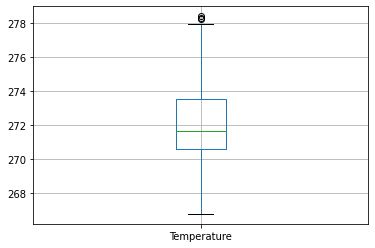

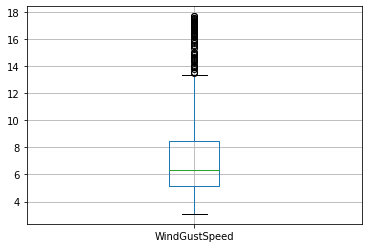

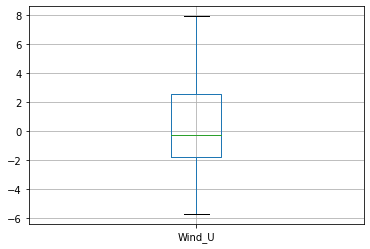

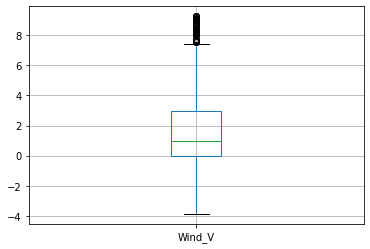

In [7]:
#df_jan.Wind_V.describe()
for column in df_en1_SE3:
    plt.figure()
    df_jan.boxplot([column])

except Wind_U and Pessure, all columns have outliers

In [8]:
#finding values where outliers exists
q1 = df_en1_SE3["WindGustSpeed"].quantile(0.25)
q3  = df_en1_SE3["WindGustSpeed"].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
higher_bound = q3 + (1.5 * iqr)

df_speed_outliers = df_en1_SE3[(df_en1_SE3["WindGustSpeed"] > higher_bound) | (df_en1_SE3["WindGustSpeed"] < lower_bound)]
#df_filtered = df_en1_SE3[(df_en1_SE3["Wind_V"] < higher_bound) | (df_en1_SE3["Wind_V"] > lower_bound)]
df_speed_outliers

,CloudCover,Pressure,RelativeHumidity,Temperature,WindGustSpeed,Wind_U,Wind_V
time,,,,,,,
2000-01-07 15:00:00,0.461065,102117.730,0.758412,271.31824,13.586041,7.306570,2.966279
2000-01-07 16:00:00,0.415033,102104.055,0.781865,271.39840,13.941959,7.674765,2.497712
2000-01-07 17:00:00,0.347511,102111.484,0.802331,271.53284,14.065929,7.908127,1.885104
2000-01-07 18:00:00,0.271572,102138.234,0.819110,271.64185,13.937011,7.885723,1.124280
2000-01-07 19:00:00,0.185618,102166.940,0.831346,271.68457,13.467939,7.631301,0.409499
...,...,...,...,...,...,...,...
2000-02-27 14:00:00,0.918487,104009.010,0.677409,263.72287,14.914069,-7.434780,-3.544105
2000-02-27 15:00:00,0.909084,104043.780,0.684106,263.58570,14.745269,-7.317592,-3.535132
2000-02-27 16:00:00,0.868734,104073.445,0.701304,263.31277,14.426575,-7.049931,-3.552226


In [9]:
lower_bound

0.2174060624999994

In [10]:
higher_bound

13.1034719625

In [11]:
df_power_ref = wind_power_data[(wind_power_data['time'].between('2000-01-01 00:00:00', '2000-03-31 23:00:00'))]

In [12]:
q1 = df_power_ref["SE3"].quantile(0.25)
q3  = df_power_ref["SE3"].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
higher_bound = q3 + (1.5 * iqr)

df_power_outliers = df_power_ref[(df_power_ref["SE3"] > higher_bound) | (df_power_ref["SE3"] < lower_bound)]
#df_filtered = df_en1_SE3[(df_en1_SE3["Wind_V"] < higher_bound) | (df_en1_SE3["Wind_V"] > lower_bound)]
df_power_outliers

,time,SE1,SE2,SE3,SE4
358,2000-01-15 22:00:00,314.824216,1693.240757,1937.181367,1398.335528
360,2000-01-16 00:00:00,283.809731,1632.928546,1942.873840,1386.256291
361,2000-01-16 01:00:00,265.853644,1607.123863,1941.042802,1392.818151
362,2000-01-16 02:00:00,258.370003,1612.001509,1950.135133,1391.614289
363,2000-01-16 03:00:00,238.487396,1532.580348,1942.920900,1402.023121
364,2000-01-16 04:00:00,201.238465,1488.528914,1938.583454,1411.038887
569,2000-01-24 17:00:00,72.238335,852.465524,1985.952323,1430.954359
570,2000-01-24 18:00:00,74.425225,1060.201323,2050.820436,1445.769256
571,2000-01-24 19:00:00,49.944224,1225.497275,2071.126170,1439.458160
572,2000-01-24 20:00:00,43.730071,1293.838062,2059.057492,1452.037384
